# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> ANN and Deep Learning </center>

# Table of contents  
  
1. [](#)
2. [](#)

## Set up the environment

### For Anaconda 

Создание virtual environment:  
  
``` 
conda create -n minor_dl_env python=3.6
```

По умолчанию minor_dl_env будет создана в папке env в директории conda.  
Локацию можно изменить указав при создании полный путь:  
  
```
conda create -p full/path/to/minor_dl_env python=3.6
```

Список все установленных окрудений:  
  
```
conda env list
```

Чтобы работать в конкретном окржуении, нужно его активировать. После этого можно работать как обычно.  
  
``` 
conda activate minor_dl_env
```  
  
Деактивация:  
  
``` 
deactivate 
```

Чтобы использовать virt env как ядро в Jupyter notebook, нужно в этом окржуении установить модуль `nb_conda`:  
  
```
conda activate minor_dl_env
conda install nb_conda
```  
  
После этого minor_dl_env появится в списке ядер (если jupyter notebook был запущен, нужно будет перезапустить). 

Далее можно устанавливать все необходимые для работы модули, используя conda или pip.

Подробнее про virtual environment в conda можно почитать [здесь](https://conda.io/docs/user-guide/tasks/manage-environments.html).

## Установка tensorflow + Keras

### For Anaconda

Активируйте virt env и через conda установите tensorflow:  
  
```
conda activate minor_dl_env   
  
conda install tensorflow
```

[Утвержается](https://towardsdatascience.com/stop-installing-tensorflow-using-pip-for-performance-sake-5854f9d9eb0c), что версия conda работает быстрее за счет использования MKL (и это относится также к scikit-learn и numpy).

### For Python

Интструкция по созданию virt env и установке tensorflow в python для разных платформ: [здесь](https://www.tensorflow.org/install/pip).

## Data

In [42]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [43]:
print(tf.__version__)

1.10.0


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')

### MNIST

In [45]:
mnist_data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [46]:
print('Train data size:', train_images.shape,
      '\nTest data size:', test_images.shape,
      '\n\nTrain label size:', train_labels.shape,
      '\nTest label size:', test_labels.shape)

Train data size: (60000, 28, 28) 
Test data size: (10000, 28, 28) 

Train label size: (60000,) 
Test label size: (10000,)


**Labels**

In [47]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [49]:
np.unique(test_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

**Data**

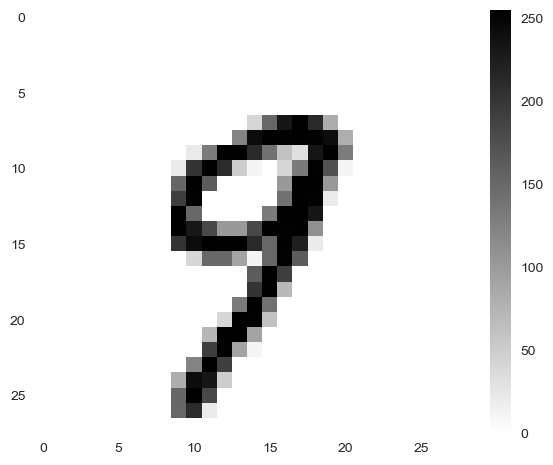

In [50]:
plt.figure()
plt.imshow(train_images[57], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

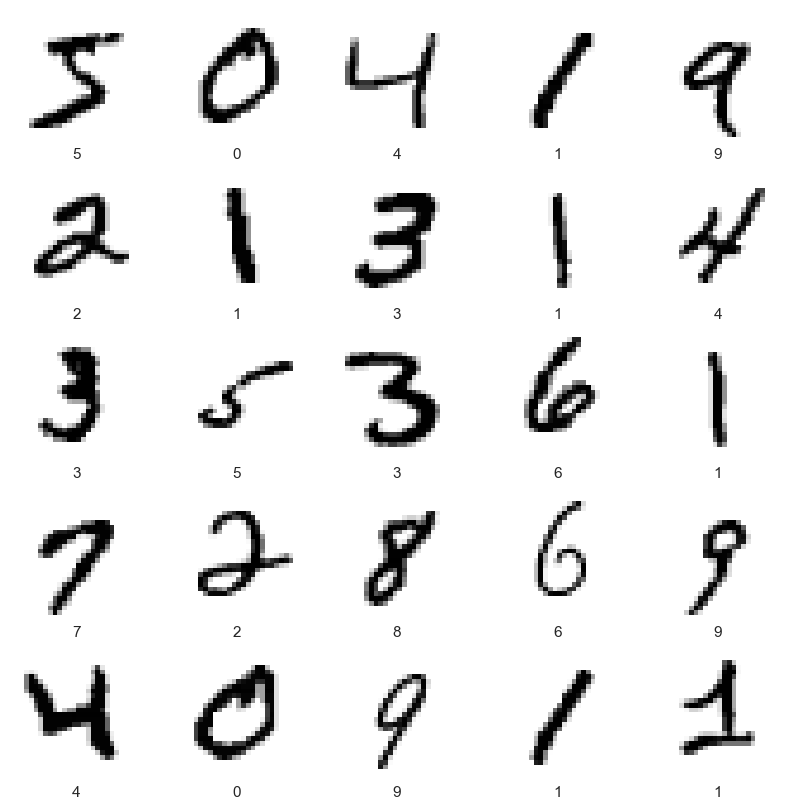

In [51]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.grid(False)

plt.show()

<br>
<rn>
Переведем значения в шкалу от 0 до 1:

In [52]:
train_images = train_images / 255.0
test_images = test_images / 255.0

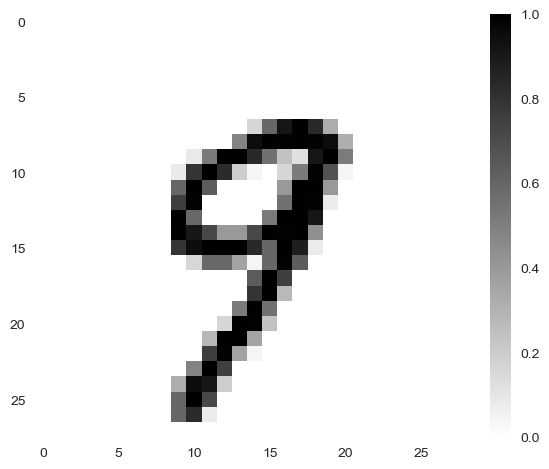

In [53]:
plt.figure()
plt.imshow(train_images[57], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

## Linear classifier

Построим однослойную сеть (без скрытых слоев).

Layers: [here](https://www.tensorflow.org/api_docs/python/tf/layers)

In [54]:
linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # перевод данных в вектор размерности 28*28=784 (построчно)
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 - число классов
])

Функции потерь (loss functions): в [keras](https://keras.io/losses/) и [tensorflow](https://www.tensorflow.org/api_guides/python/nn#Losses)  
Метрики: в [keras](https://keras.io/metrics/) и [tensorflow](https://www.tensorflow.org/api_docs/python/tf/metrics)

In [55]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [56]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7782 - acc: 0.8137
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.4560 - acc: 0.8805
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.4031 - acc: 0.8909
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3767 - acc: 0.8968
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3600 - acc: 0.9007
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3481 - acc: 0.9031
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3391 - acc: 0.9052
Epoch 8/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3319 - acc: 0.9072
Epoch 9/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3261 - acc: 0.9093
Epoch 10/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3212 - acc: 0.9103

In [57]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 26us/step


In [58]:
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Test accuracy: 0.9141 
Test loss: 0.3060480312824249


У каждого пикселя есть свой вес, веса разные для каждого класса.  
Мы можем свернуть вектор весов в картинку $28 \times 28$ и провизуализировать:

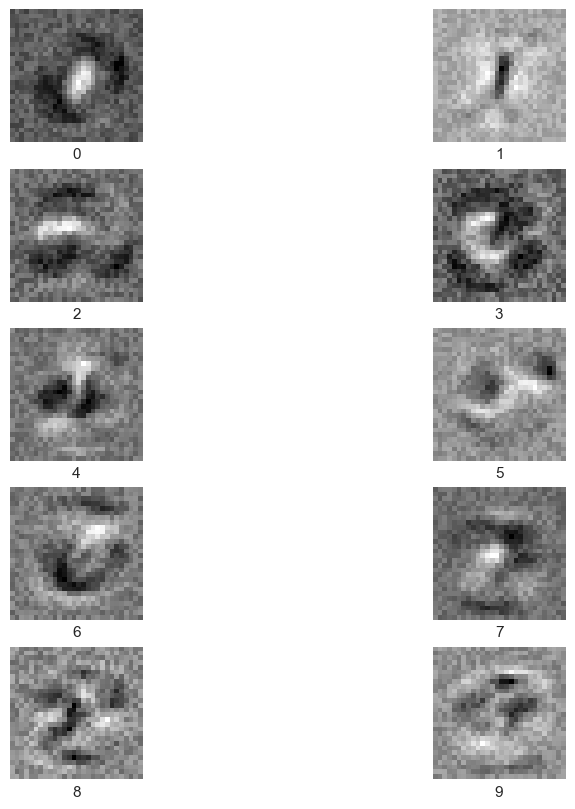

In [59]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)) * -1, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

На некоторых изображениях можно увидеть ччто-то похожее на цифру, соотвествующую классу. 

In [60]:
from sklearn import metrics
from plot_cm import plot_confusion_matrix

ModuleNotFoundError: No module named 'plot_cm'

In [ ]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 10),
                      normalize=True)

In [ ]:
%%time 

linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # перевод данных в вектор размерности 28*28=784 (построчно)
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 - число классов
])

linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(train_images, train_labels, epochs=100, verbose=0)

In [ ]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)), cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

In [ ]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 10),
                      normalize=True)

## Многослойная нейросеть

Функции активации (activations): в [keras](https://keras.io/activations/) и [tensorflow](https://www.tensorflow.org/api_guides/python/nn#Activation_Functions)

Добавим один скрытый слой из 100 нейронов в модель:

In [ ]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten(input_shape=(28, 28))) # перевод данных в вектор размерности 28*28=784 (построчно)
linear_model.add(keras.layers.Dense(100))
linear_model.add(keras.layers.Activation('relu')) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Dense(10, activation=tf.nn.softmax)) # 10 - число классов

In [ ]:
linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

In [ ]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

In [ ]:
len(linear_model.layers)

In [ ]:
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 10),
                      normalize=True)

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)), cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

In [ ]:
df = pd.DataFrame(linear_model.get_layer(index=3).get_weights()[0][:,5].reshape(10,10).round(3))
df.style.background_gradient(cmap='coolwarm')

<br>
<br>
### Задание  
  
* Используйти данные Fashion MNIST - их можно загрузить также, только вместо `keras.datasets.mnist` вызывайте `keras.datasets.fashion_mnist`  
* Обучите линейную модель (однослойную нейросеть, без скрытых слоев), оцените качество, провизуализируйте веса.  
* Обучите модель с одним скрытым слоем, поцените качество, посмотрите на веса, сравните с линейной моделью.  

In [81]:
mnist_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [82]:
print('Train data size:', train_images.shape,
      '\nTest data size:', test_images.shape,
      '\n\nTrain label size:', train_labels.shape,
      '\nTest label size:', test_labels.shape)

Train data size: (60000, 28, 28) 
Test data size: (10000, 28, 28) 

Train label size: (60000,) 
Test label size: (10000,)


In [83]:
train_images = train_images / 255.0
test_images = test_images / 255.0

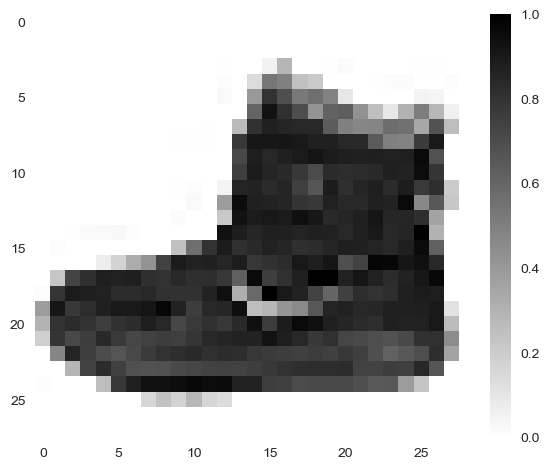

In [84]:
plt.figure()
plt.imshow(train_images[0], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

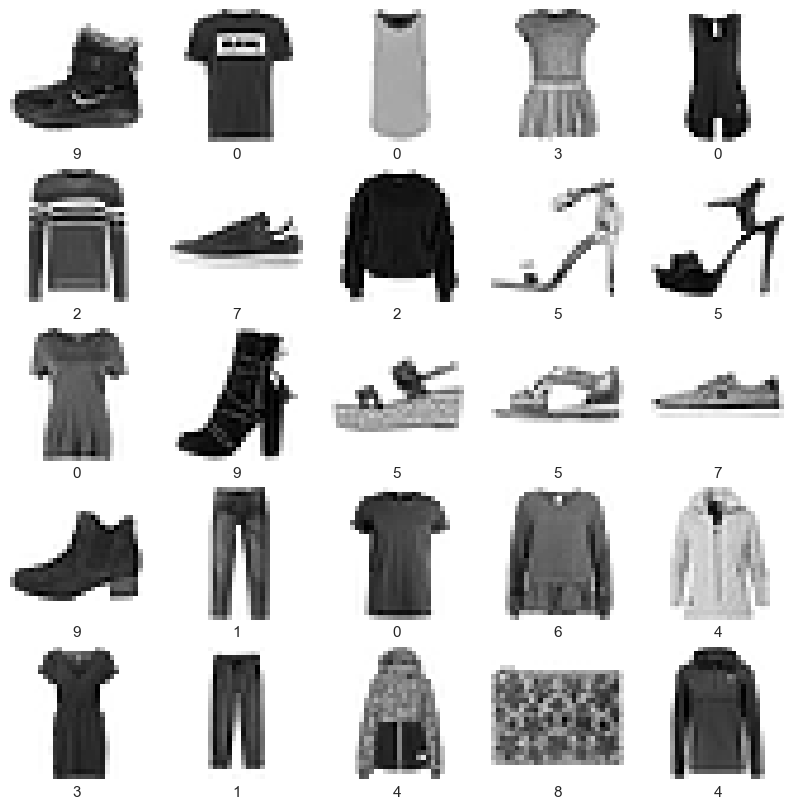

In [85]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.grid(False)

plt.show()

In [86]:
linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [88]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [89]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.8231 - acc: 0.7401
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.5918 - acc: 0.8079
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.5422 - acc: 0.8213
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.5153 - acc: 0.8289
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4981 - acc: 0.8339
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4852 - acc: 0.8376
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4757 - acc: 0.8397
Epoch 8/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4681 - acc: 0.8421
Epoch 9/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.4613 - acc: 0.8435
Epoch 10/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.4562 - acc: 0.8453

In [91]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 24us/step


In [92]:
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Test accuracy: 0.835 
Test loss: 0.48557708339691164


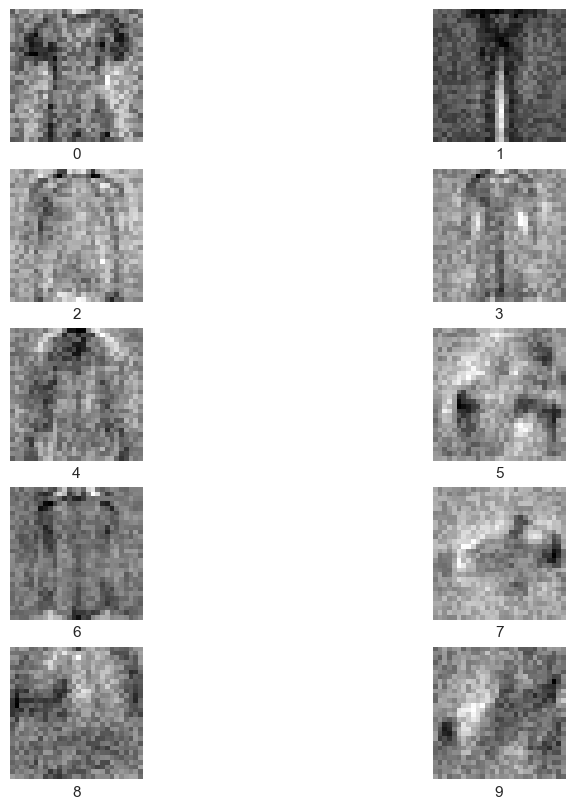

In [93]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)) * -1, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

In [105]:
from tensorflow import train

SyntaxError: invalid syntax (<ipython-input-105-848835f33e6a>, line 1)

Пробую многослойную сеть

In [106]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten(input_shape=(28, 28)))
linear_model.add(keras.layers.Dense(128, activation=tf.nn.relu))
linear_model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [107]:
linear_model.compile(optimizer=train.AdamOptimizer(), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [108]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

In [109]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

10000/10000 [==============================] - 0s 41us/step
Test accuracy: 0.8838 
Test loss: 0.3248329364061356


## Параметры нейросети

Способы инициализации весов: в [keras](https://keras.io/initializers/)

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [35]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100, activation='relu', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros'),  # скрытый слой из 100 нейронов
        Dense(50, activation='relu', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros'),   # скрытый слой из 50 нейронов
        Dense(10, activation='softmax', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros') # выходной слой из 10 нейронов по числу классов
    ]
)

In [36]:
ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
%%time
ann_model.fit(train_images, train_labels, epochs=100, verbose=0)

10000/10000 [==============================] - 0s 25us/step
Wall time: 3min 45s


In [40]:
test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

10000/10000 [==============================] - 0s 21us/step
Test accuracy: 0.9772 
Test loss: 0.09014754519591298


<br>
<br>
Инициализируем нулями и посмотрим на результат:

In [47]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100, activation='relu', 
              kernel_initializer='zeros', bias_initializer='zeros'),  # скрытый слой из 100 нейронов
        Dense(50, activation='relu', 
              kernel_initializer='zeros', bias_initializer='zeros'),   # скрытый слой из 50 нейронов
        Dense(10, activation='softmax', 
              kernel_initializer='zeros', bias_initializer='zeros') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [48]:
%%time
ann_model.fit(train_images, train_labels, epochs=100, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

10000/10000 [==============================] - 0s 25us/step
Test accuracy: 0.1135 
Test loss: 2.301069207763672
Wall time: 3min 50s


### Batch

In [62]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100, activation='relu'),  # скрытый слой из 100 нейронов
        Dense(50, activation='relu'),   # скрытый слой из 50 нейронов
        Dense(10, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [64]:
%%time
ann_model.fit(train_images, train_labels, epochs=200, verbose=0, batch_size=512)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

10000/10000 [==============================] - 0s 23us/step

Test accuracy: 0.9734 
Test loss: 0.08487982233446091 

Wall time: 2min 17s


In [70]:
from tensorflow.keras.layers import BatchNormalization, Activation

In [71]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100),  # скрытый слой из 100 нейронов
        BatchNormalization(),
        Activation('relu'),
        Dense(50),   # скрытый слой из 50 нейронов
        BatchNormalization(),
        Activation('relu'),
        Dense(10, activation='softmax') # выходной слой из 10 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [72]:
%%time
ann_model.fit(train_images, train_labels, epochs=200, verbose=0, batch_size=512)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

10000/10000 [==============================] - 0s 40us/step

Test accuracy: 0.9745 
Test loss: 0.08510605235304683 

Wall time: 2min 54s
